# Introduction

Plotting is used to explore data, and is one of the most important tasks that engineers and scientists use computers for. 
Plots are used to:

- present and understand data; and
- to check computed results visually.

The most widely used Python module for plotting is Matplotlib (<https://matplotlib.org/>), and this is what we will use. Matplotlib is extremely powerful and we will use only a small fraction of its functionality.
The material in this notebook will provide you with a basis that you can build 
upon for more advanced plotting by searching online resources. A good place to start for 
a wide range of examples is the Matplotlib Gallery (https://matplotlib.org/gallery.html).



## Why do we plot programmatically?

Producing plots via a program is very powerful. It allows you to explore and manipulate 
data in sophisticated ways. It also allows you to make plotting interactive; 
from a large and complex data
set you can design interfaces for you and others to query the data and have it displayed graphically, 
possibly over the Internet.
It also allows you to automate the fetching and processing of  data from online sources or 
from laboratory equipment.


## Objectives

- Introduction to a programmatic approach to plotting 
- Create line plots and bar charts from discrete data sets
- Create line plots of mathematical functions
- Create histograms for distribution-like data 


# Matplotlib

Let's first make sure it's installed:

In [1]:

%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


To use Matplotlib, we need to import it. We will be using the `pyplot` interface to Matplotlib, so we need to import `pyplot` too:

In [2]:
import matplotlib
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


We will be using NumPy when producing plots, so we import it now:

In [3]:
import numpy as np

Matplotlib is a regular Python library that can be used outside of Jupyter notebooks to display plots to the screen or to write plots to a file. To have plots appear inline in a Jupyter notebook, we need the 'magic' command
[`%matplotlib inline`](Notebook%20tips.ipynb#Matplotlib):

In [4]:
%matplotlib inline

If you want to increase the default font size, use:
```python
matplotlib.rcParams.update({'font.size': 16})
```

# Simple line plots

Given the data set

$x$ value  | $f$ value
----------:|----------:
-1         | -1
3          | -2
4          | 7
8          | 13
10         | 1

we want to create a line plot of $x$-values (horizontal axis) against the $f$ values (vertical axis).

We first create a list of `x` values and a list of `f` values:

In [6]:
x = [-1, 3, 4, 8 , 10]
f = [-1, -2, 7, 13 , 1]

We now use the `plt.plot` function to produce a line plot:

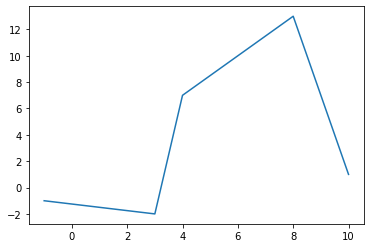

In [7]:
plt.plot(x, f)
plt.show()

Note that `x` and `f` are lists, but they could be any ordered array-like structure, e.g. tuple or NumPy array. 

We can improve the plot by adding axis labels, a title and dots to indicate data points.

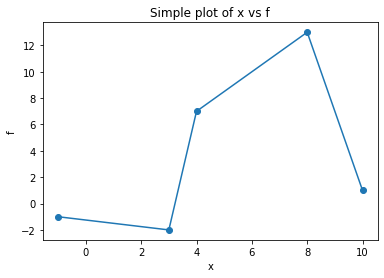

In [8]:
# Plot data with a line and dots at the data points (this is what '-o' does)
plt.plot(x, f, '-o')  

# Attach labels and title 
plt.xlabel('x')
plt.ylabel('f')
plt.title("Simple plot of x vs f")
plt.show()

To change the colour of the line to red and use crosses at the data points, and to save the
plot to the file `my-plot.png`, we can do the following:

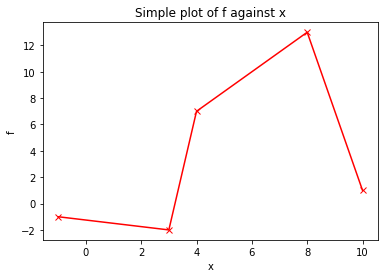

In [9]:
# Plot data with a red solid line and crosses at the data points (this is what '-xr' does)
plt.plot(x, f, '-xr')

# Attach labels and title
plt.xlabel('x')
plt.ylabel('f')
plt.title("Simple plot of f against x")

# Save plot to file
plt.savefig("my-plot.pdf")
plt.show()

Upon executing the notebook, the file `my-plot.png` should appear in the same directory as the notebook.
You could use the file to include the plot in a document or presentation.

# Plotting mathematical functions of one variable

Line plots of a mathematical function are created by evaluating the function at a large number of points. If we use enough points, the graph of a function will appear smooth.

To plot the function:

$$
f(x) = \sin(x)
$$

the first step is to create an array of values at which we want to evaluate the function. We can use the NumPy function `linspace` to do this: 

In [10]:
num_points = 100
x = np.linspace(0, 4*np.pi, num=num_points)

The above creates a NumPy array with `num_points` equally spaced values between $0$ and 
$4 \pi$, including the end points. We can check this for a smaller example: 

In [11]:
print(np.linspace(0, 2, num=10))

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


To evaluate $\sin(x)$ for each value in the array `x`, we use the NumPy `sin` function, which can be applied entry-wise to `x`:

In [14]:
f = np.sin(x)

We can now plot `f` against `x`.

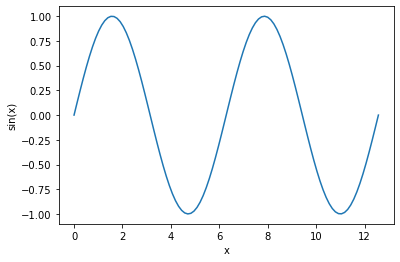

In [15]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

We can improve the appearance of the plot by specifying the $x$ limits:

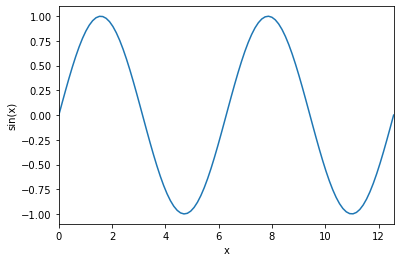

In [16]:
# Plot the graph
plt.plot(x, f)

# Label the axis
plt.xlabel('x')
plt.ylabel('sin(x)')

# Use the start and end values in x as x limits (recall that x[-1] 
# returns the last value in x)
plt.xlim(x[0], x[-1])

plt.show()

To plot two functions on one graph, we use `plt.plot` twice:

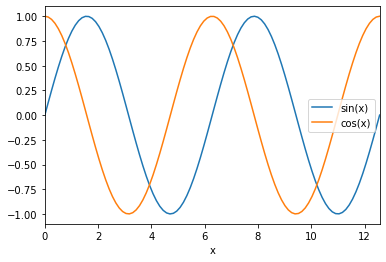

In [17]:
x = np.linspace(0, 4*np.pi, num=100)

# Plot sin(x) and cos(x), and add label for each
plt.plot(x, np.sin(x), label="sin(x)")
plt.plot(x, np.cos(x), label="cos(x)")

# Label the x-axis
plt.xlabel('x')

# Add legend
plt.legend()

# Use the start and end values in x as x limits
plt.xlim(x[0], x[-1])

plt.show()

# Bar charts and histograms

## Bar charts

The numbers of students in each year of the Engineering Tripos, and graduate students are:

In [18]:
cohort = ('IA', 'IB', 'IIA', 'IIB', 'Graduate')
num_students = (332, 270, 256, 238, 451)

We want to represent these figures using a bar chart:

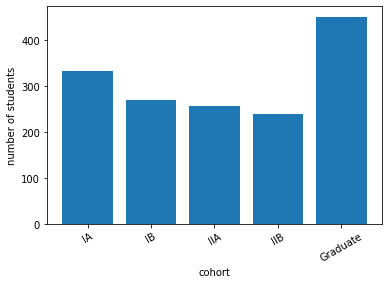

In [19]:
# Create an array with the position of each bar along the x-axis, e.g [0, 1, 2, 3, 4] 
x_pos = np.arange(len(cohort))

# Produce bar plot
plt.bar(x_pos, num_students, align='center');

# Replace the x ticks with the Tripos name, and rotate labels 30 degrees
plt.xticks(x_pos, cohort, rotation=30)

# Add axis labels 
plt.xlabel('cohort')
plt.ylabel('number of students')

plt.show()

## Histograms

To create a histogram we first need a data set. We will use 4000 random values drawn from a normal (Gaussian) distribution with zero mean and standard deviation of one. We can use NumPy to create such an array using:

In [20]:
# loc=mean, scale=stddev, size=num samples
x = np.random.normal(loc=0.0, scale=1.0, size=5000)  

We can visualise the distribution of the values using a histogram.
A histogram works by collecting data into intervals (bins) along the horizontal axis. 
The number of values that fall within a 'bin' is then displayed on the vertical axis.
Using 20 bins, we can visualise how `x` is distributed:

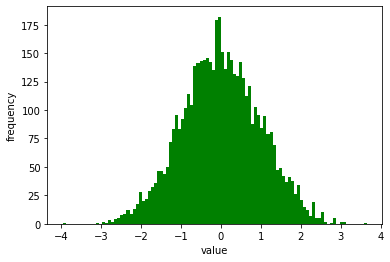

In [22]:
# Produce histogram with 20 bins (try changing the number of bins)
n, bins, patches = plt.hist(x, 100, facecolor='green');

# Add label
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

Matplotlib has automatically created 20 bins of equal width, and computed the number of entries in each bin. We can inspect the bin intervals

In [23]:
print(bins)

[-3.97213274 -3.89583436 -3.81953599 -3.74323762 -3.66693924 -3.59064087
 -3.5143425  -3.43804412 -3.36174575 -3.28544738 -3.20914901 -3.13285063
 -3.05655226 -2.98025389 -2.90395551 -2.82765714 -2.75135877 -2.67506039
 -2.59876202 -2.52246365 -2.44616528 -2.3698669  -2.29356853 -2.21727016
 -2.14097178 -2.06467341 -1.98837504 -1.91207666 -1.83577829 -1.75947992
 -1.68318155 -1.60688317 -1.5305848  -1.45428643 -1.37798805 -1.30168968
 -1.22539131 -1.14909294 -1.07279456 -0.99649619 -0.92019782 -0.84389944
 -0.76760107 -0.6913027  -0.61500432 -0.53870595 -0.46240758 -0.38610921
 -0.30981083 -0.23351246 -0.15721409 -0.08091571 -0.00461734  0.07168103
  0.14797941  0.22427778  0.30057615  0.37687452  0.4531729   0.52947127
  0.60576964  0.68206802  0.75836639  0.83466476  0.91096314  0.98726151
  1.06355988  1.13985825  1.21615663  1.292455    1.36875337  1.44505175
  1.52135012  1.59764849  1.67394686  1.75024524  1.82654361  1.90284198
  1.97914036  2.05543873  2.1317371   2.20803548  2

And the number of values in each bin:

In [ ]:
print(n)

We can mix plot types on a single graph - in the case of a histogram it can be useful to compare against
a probability density function. Since we drew the values in `x` from a normal distribution, we expect a normal probability distribution function to be a good fit. Let's test.

We can use the module `scipy.stats` to compute the normal probability distribution function. To compare the histogram to a probability density function, the histogram needs to be 'normalised' 
(so the integral is equal to 1).

In [25]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


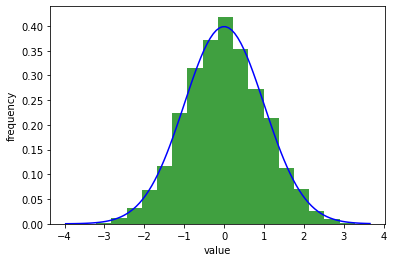

In [26]:
# Import norm from SciPy stats module to compute norm probability distribution function
from scipy.stats import norm

# Plot normed histogram of data
n, bins, patches = plt.hist(x, 20, facecolor='green', alpha=0.75, density=True)

# Create array of 100 equally spaces points, stating from the first value in the bins
# through to the last values in the bins
xf = np.linspace(bins[0], bins[-1], 100)

# Evaluate normal probability density function (pdf) at each xf
f = norm.pdf(xf)

# # Create line plot of normal probability distribution function (blue line)
plt.plot(xf, f, 'b')

# # Add labels
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

Experiment with the histogram plots by changing the number of samples and the number of bins.

# Pie charts

At the time of the 2011 census, the population of Cambridgeshire by district was:

District              | Population
---------------------:|------------:
Cambridge City        | 123900
East Cambridgeshire   | 83800
Fenland               | 95300
Huntingdonshire       | 169500
South Cambridgeshire  | 148800

As part of a presentation to the Cambridge City council, we need to produce
a pie chart of the Cambridgeshire population by district, indicating the percentage of
residents in each district and highlighting the Cambridge City 'slice'.

To do this, we first enter the data into tuples :

In [27]:
district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)

Tuples are appropriate because the number of districts is fixed (recall that we can't change the length of a tuple).

We next produce a colour pie chart:

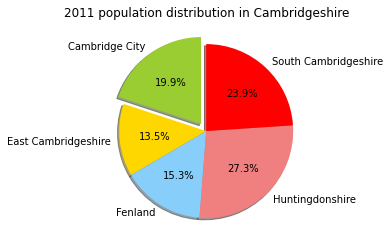

In [28]:
# Specify slice colours 
# (see https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

# "explode" the 1st slice (Cambridge City)
explode = (0.1, 0.0, 0, 0, 0)  

# Produce pie chart. The slices will be ordered and plotted counter-clockwise.
plt.pie(population, explode=explode, labels=district, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Add title
plt.title("2011 population distribution in Cambridgeshire")

plt.show()

## Exercise 08.1 (function plotting)

Consider the function 
$$
f(x) = e^{x/10} \sin(\omega_{1}x)\cos(\omega_{0}x)
$$
from $x = -4\pi$ to $x = 4\pi$.

(1) Plot the function when $\omega_{0} = \omega_{1} = 1$. Label the axes.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

(-12.566370614359172, 12.566370614359172)

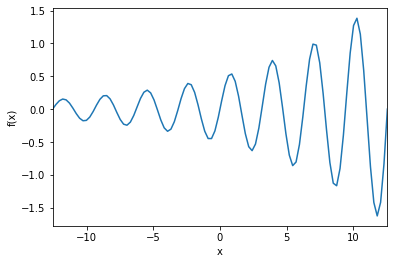

In [6]:
num_points = 100
x = np.linspace(-4*np.pi, 4*np.pi, num=num_points)

f = np.exp(x/10)*np.sin(x)*np.cos(x)

plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(x[0],x[-1])


## Exercise 08.2 (multiple function plotting)

Plot the function 

$$
f(x)  = \frac{\sin(x)}{x}
$$

from $x = -6\pi$ to $x = 6\pi$. Think carefully about which $x$ values you use when 
$x$ is close to zero.
  
Add to the above plot the graph of $1/ \left| x \right|$, and limit the range of the $y$ axis to 1 using
`plt.ylim`. (Hint: use `np.abs(x)` to return the absolute values of each 
component of a NumPy array `x`.)

(-18.84955592153876, 18.84955592153876)

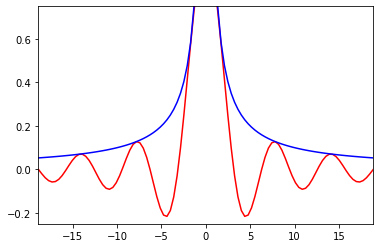

In [8]:
x = np.linspace(-6*np.pi, 6*np.pi, num=num_points)
f = (np.sin(x))/x

plt.plot(x,f,"-r")

f1 = 1/np.abs(x)
plt.plot(x,f1,"-b")
plt.ylim(-0.25,0.75)
plt.xlim(x[0],x[-1])
